In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df=pd.read_csv(r"C:\Users\shrouk\Desktop\car_purchasing.csv")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [23]:
print(df.head(10))

     customer name                                    customer e-mail  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   
5     Carla Hester                                 mi@Aliquamerat.edu   
6   Griffin Rivera                                  vehicula@at.co.uk   
7       Orli Casey    nunc.est.mollis@Suspendissetristiqueneque.co.uk   
8     Marny Obrien                        Phasellus@sedsemegestas.org   
9    Rhonda Chavez                                    nec@nuncest.com   

          country  gender        age  annual Salary  credit card debt  \
0        Bulgaria       0  41.851720    62812.09301      11609.380910   
1          Belize       0  40.870623    66646.8929

In [38]:
print(df.duplicated().sum())
print(df['country'].duplicated().sum())

0
288


In [25]:
print(df.describe())

           gender         age  annual Salary  credit card debt  \
count  500.000000  500.000000     500.000000        500.000000   
mean     0.506000   46.241674   62127.239608       9607.645049   
std      0.500465    7.978862   11703.378228       3489.187973   
min      0.000000   20.000000   20000.000000        100.000000   
25%      0.000000   40.949969   54391.977195       7397.515792   
50%      1.000000   46.049901   62915.497035       9655.035568   
75%      1.000000   51.612263   70117.862005      11798.867487   
max      1.000000   70.000000  100000.000000      20000.000000   

            net worth  car purchase amount  
count      500.000000           500.000000  
mean    431475.713625         44209.799218  
std     173536.756340         10773.178744  
min      20000.000000          9000.000000  
25%     299824.195900         37629.896040  
50%     426750.120650         43997.783390  
75%     557324.478725         51254.709517  
max    1000000.000000         80000.000000  


In [26]:
### detect outliers by box plot

q1 = df['annual Salary'].quantile(0.25)
q3 = df['annual Salary'].quantile(0.75)
iqr = q3 - q1
lower = (q1 - 1.5 * iqr)
upper = (q3 + 1.5 * iqr)
print("Q1 (25%) =" ,q1 ,"   ","Q3 (75%) =" ,q3,"   ","IQR =" , iqr,"   ","lower =" ,lower ,"   ","upper =" ,upper)
outlier_array = []
number_of_outlier_element = 0
for item in df['annual Salary']:
    if(item < lower):
        outlier_array.append(item)
        number_of_outlier_element = number_of_outlier_element + 1
    elif(item > upper):
        outlier_array.append(item)
        number_of_outlier_element = number_of_outlier_element + 1
outlier_array.sort()
print("Number Of Outlier Element : ",number_of_outlier_element,"elements")
print("Number Of Non Outlier Element : ",(df['annual Salary'].count()-number_of_outlier_element),"elements")
print(f"Outliers is : {outlier_array}")


Q1 (25%) = 54391.977195     Q3 (75%) = 70117.862005     IQR = 15725.884810000003     lower = 30803.149979999995     upper = 93706.68922
Number Of Outlier Element :  2 elements
Number Of Non Outlier Element :  498 elements
Outliers is : [20000.0, 100000.0]


In [27]:
#drop outliers
df=df.drop(df[df['annual Salary']==20000.0 ].index)
df=df.drop(df[df['annual Salary']==100000.0 ].index)

Text(0.5, 1.0, 'annual Salary')

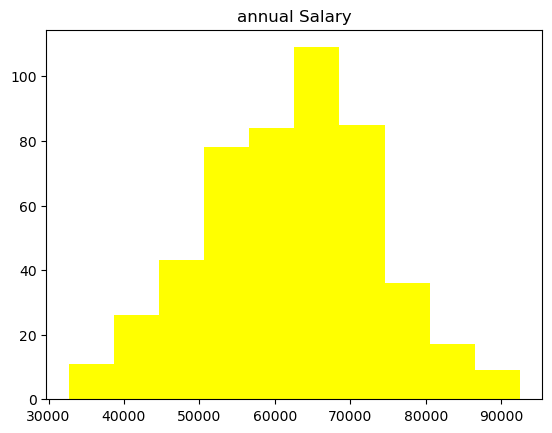

In [28]:
plt.hist(df['annual Salary'],bins=10,color='yellow')
plt.title('annual Salary')

Text(0.5, 1.0, 'credit card debt')

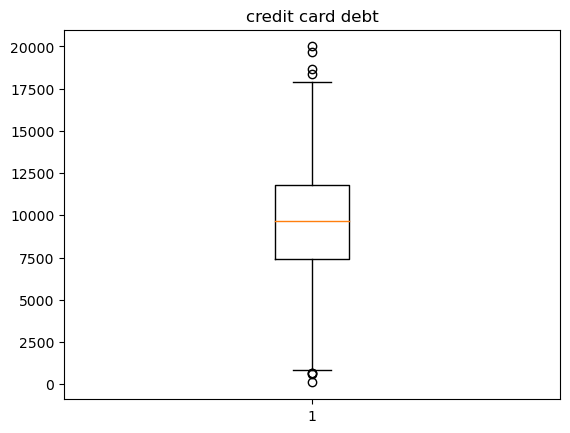

In [29]:
plt.boxplot(df['credit card debt'])
plt.title('credit card debt')

Text(0.5, 1.0, 'relation between annual salary & car purchase amount')

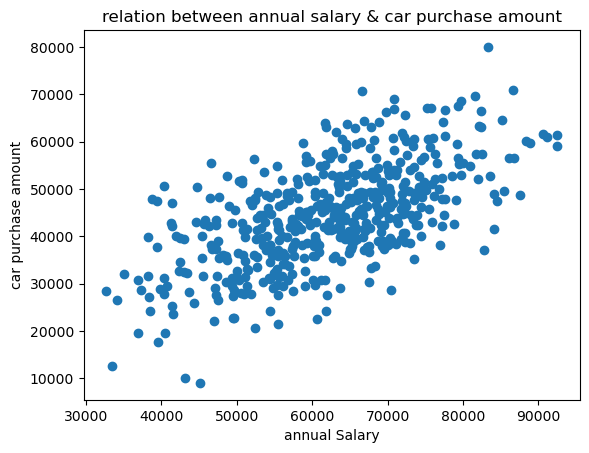

In [30]:
plt.scatter(x=df['annual Salary'], y=df['car purchase amount'])
plt.ylabel('car purchase amount')
plt.xlabel('annual Salary')
plt.title('relation between annual salary & car purchase amount')

In [31]:
males=df[df['gender'] == 1]
females=df[df['gender'] == 0]

Text(0.5, 1.0, 'relation between annual salary & credit card debt for males')

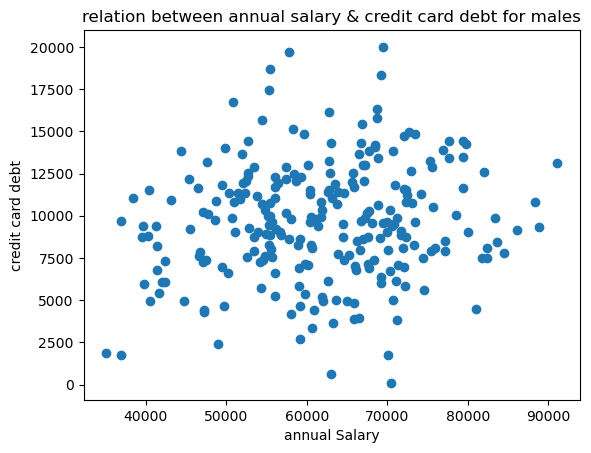

In [32]:
#relation between males annual salary & credit card debt
plt.scatter(x=males['annual Salary'], y=males['credit card debt'])
plt.ylabel('credit card debt')
plt.xlabel('annual Salary')
plt.title('relation between annual salary & credit card debt for males')

Text(0.5, 1.0, 'relation between annual salary & credit card debt for females')

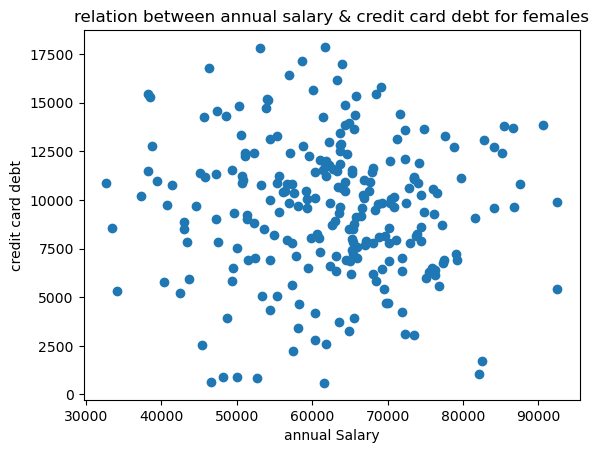

In [33]:
#relation between females annual salary & credit card debt
plt.scatter(x=females['annual Salary'], y=females['credit card debt'])
plt.ylabel('credit card debt')
plt.xlabel('annual Salary')
plt.title('relation between annual salary & credit card debt for females')

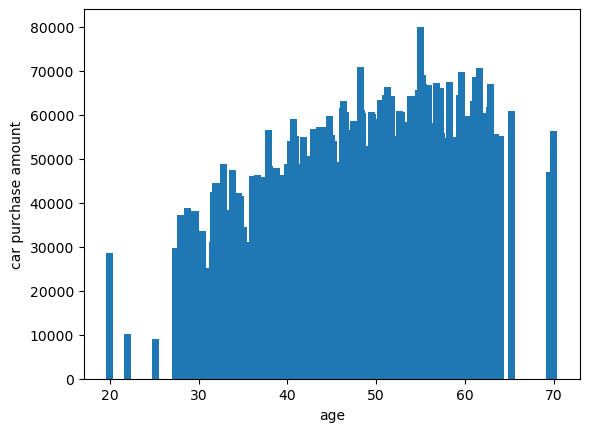

In [34]:
plt.bar(df['age'], df['car purchase amount'])
plt.ylabel('car purchase amount')
plt.xlabel('age')
plt.show()

C:\Users\shrouk\AppData\Local\Temp\ipykernel_17760\3465136337.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


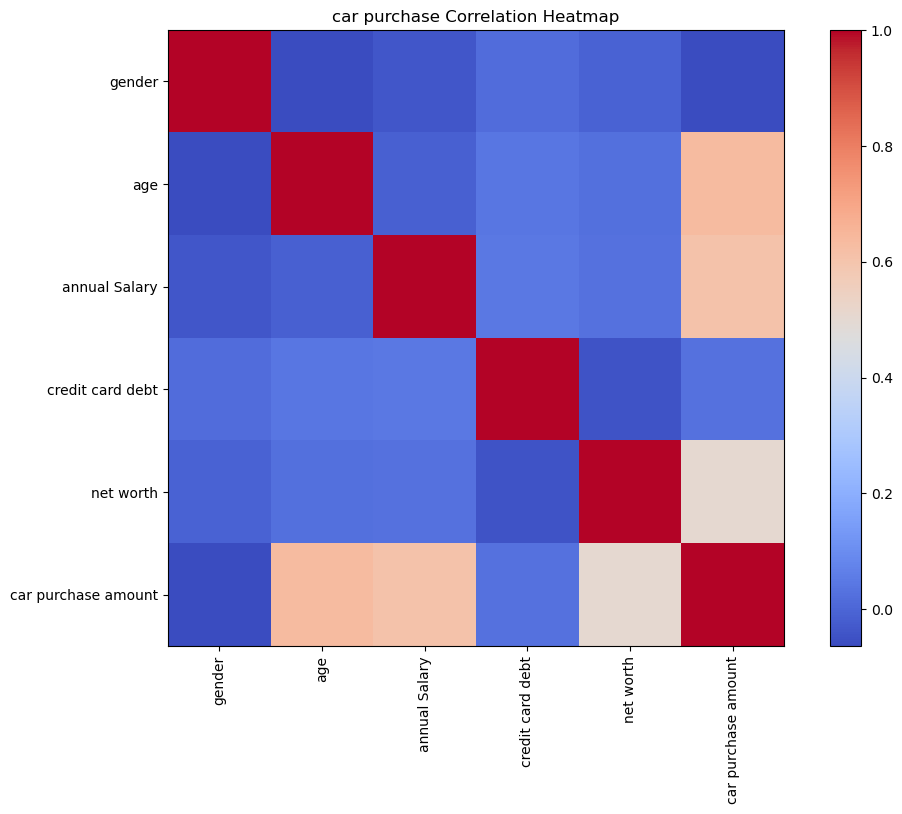

In [35]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
plt.title('car purchase Correlation Heatmap')
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(corr_matrix.columns))]
plt.xticks(tick_marks, corr_matrix.columns, rotation=90)
plt.yticks(tick_marks, corr_matrix.columns)
plt.show()

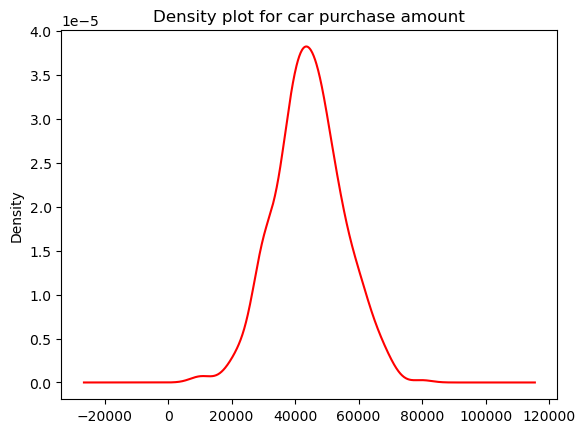

In [45]:
df['car purchase amount'].plot.density(color='red' )
plt.title('Density plot for car purchase amount')
plt.show()

In [46]:
df['country']=pd.factorize(df['country'])[0]

In [47]:
from sklearn.model_selection import train_test_split
x= df[['annual Salary','credit card debt','net worth']]
y=df['car purchase amount'] 


In [49]:
#data normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(x)
x = pd.DataFrame(normalized_data, columns=x.columns)
print(x)

     annual Salary  credit card debt  net worth
0         0.503806          0.578361   0.223430
1         0.567962          0.476028   0.521402
2         0.353011          0.555797   0.631089
3         0.780819          0.719908   0.539387
4         0.452229          0.264257   0.551331
..             ...               ...        ...
493       0.656556          0.346528   0.532316
494       0.390501          0.613139   0.347366
495       0.605469          0.528221   0.759726
496       0.286316          0.699147   0.324313
497       0.479692          0.466902   0.451986

[498 rows x 3 columns]


In [50]:
y = (df['car purchase amount'] - df['car purchase amount'].min()) / (df['car purchase amount'].max() - df['car purchase amount'].min())
print(y)

0      0.370725
1      0.508669
2      0.477827
3      0.822850
4      0.660781
         ...   
495    0.561992
496    0.316780
497    0.776722
498    0.513270
499    0.508552
Name: car purchase amount, Length: 498, dtype: float64


In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [52]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor(n_estimators=100, random_state=42)
rfmodel.fit(x_train, y_train)
y_pred = rfmodel.predict(x_test)


In [53]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.010359355544791598


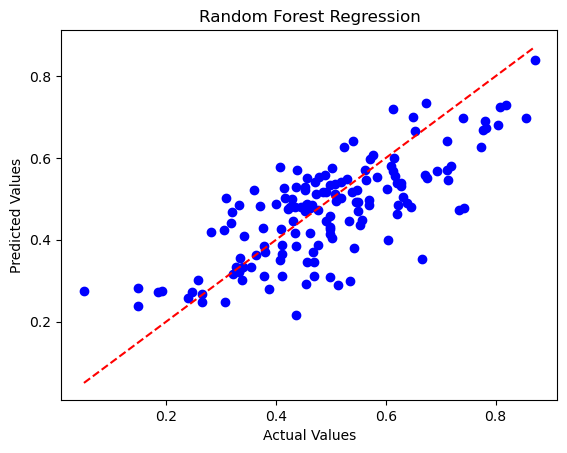

In [54]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression')
plt.show()

In [55]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.00878593223822087


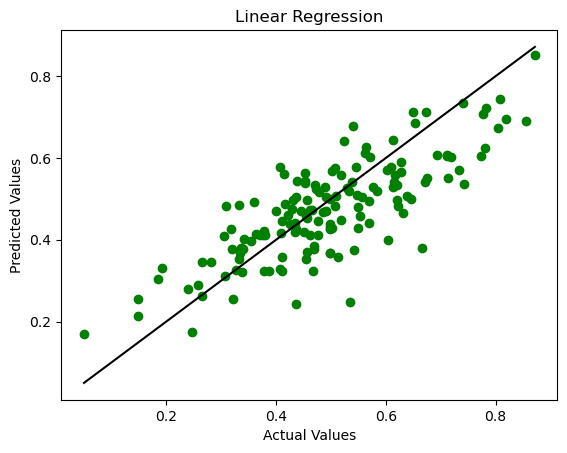

In [56]:
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression')
plt.show()